In [1]:
from IPython.display import Math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 7)

## Logistic Regression

* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
    * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
    * S자 모양의 함수

$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

* sklearn API
    * `sklearn.linear_model.LogisticRegression`


## Sigmoid 함수 그리기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# e는 np.exp()로 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

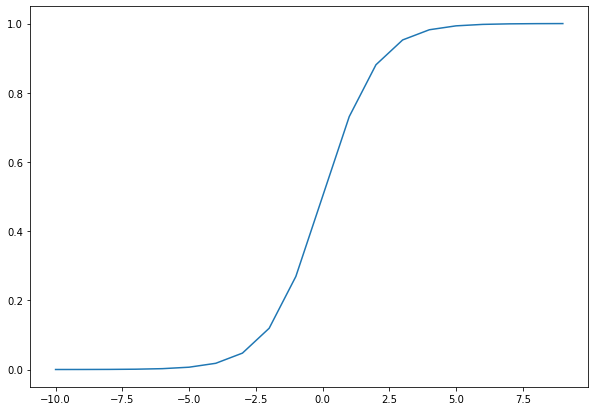

In [4]:
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

## 로지스틱 회귀 실습

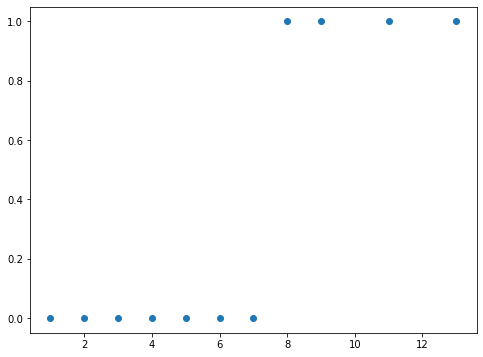

In [5]:
#교재 실습 예제
plt.figure(figsize=(8,6))
x = np.array([1,2,3,4,5,6,7,8,9,11,13])
y = np.array([0,0,0,0,0,0,0,1,1,1,1])

plt.scatter(x,y)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

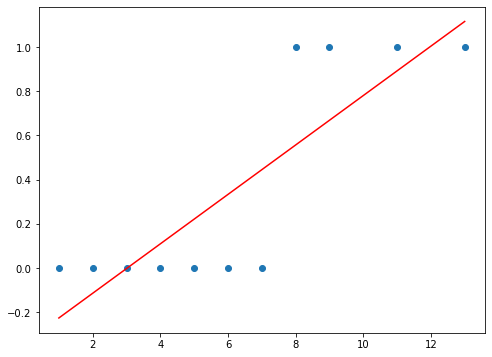

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

model = LinearRegression()
model.fit(x.reshape(-1,1),y)
pred = model.predict(x.reshape(-1,1))

plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(x, pred, c ='r')
plt.show()


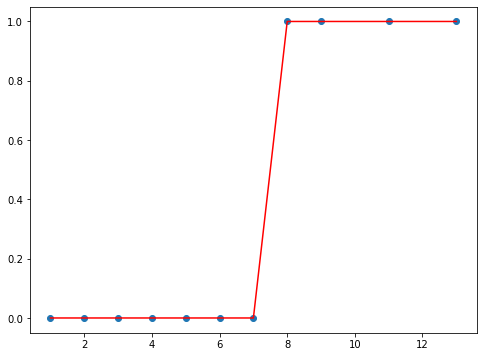

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x.reshape(-1,1),y)
pred = model.predict(x.reshape(-1,1))

plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(x, pred, c ='r')
plt.show()


In [9]:
#정확도
(pred == y).mean()
accuracy_score(pred, y)

1.0

#### 로지스틱 회귀 실습 : 위스콘신 유방암 환자

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [11]:
# 데이타셋 로드
cancer = load_breast_cancer()

In [12]:
# 데이타 프레임 
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
# standardization

scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', 1))

C:\Users\user\AppData\Local\Temp/ipykernel_7556/1922716297.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  scaled = scaler.fit_transform(df.drop('target', 1))


In [14]:
# 데트스 분할하기
x_train, x_test, y_train, y_test = train_test_split(scaled, df['target'], random_state= 10)

In [15]:
#LogisticRegression 모델생성 / 학습하고 / 예측하기
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [16]:
#정확도 측정
accuracy_score(pred, y_test)

0.958041958041958

## 분류 모델 평가지표

#### Accuracy = 예측결과가 동일한 데이타 건수 / 전체 예측 데이타 건수

1. 직접 확인<br>
    `y_test 결과와 predict 결과를 서로 비교해보면 100% 일치하고 있지
    않은 부분들이 두군데 보인다.
    직접 확인..`
2. 사용자 함수 정의<br>
   ` y_test, predict 이 2개의 변수를 비교해서 성능을 측정할수 있다.
    아래는 함수를 이용해서 성능평가 함수를 직접 구현해서 만든것임.`
3. score() 라이브러리 사용<br>
    `accuracy_score 함수를 이용해서 성능측정 한다.
    from sklearn.metrics import accuracy_score`

#### Confusion Matrix

1. 정밀도(Precision)
2. 재현율(Recall)
3. F1 Score

## Accuracy 

`직접확인`

In [17]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [18]:
y_test

172    0
553    1
374    1
370    0
419    1
      ..
545    1
161    0
434    1
59     1
164    0
Name: target, Length: 143, dtype: int32

In [19]:
# zip : 두개의 리스트값을 병렬적으로 추출하는 기능
# 2)
y_tuple=list(zip(y_test, pred))
y_tuple

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 

`사용자함수 정의`

In [20]:
count = 0
for a,b in y_tuple:
    if not a==b:
        count = count+1
        print('unmatched : (y_test, pred)=(',a,',',b,')')  
print('UnMatched Target',count,'개')

unmatched : (y_test, pred)=( 0 , 1 )
unmatched : (y_test, pred)=( 1 , 0 )
unmatched : (y_test, pred)=( 0 , 1 )
unmatched : (y_test, pred)=( 1 , 0 )
unmatched : (y_test, pred)=( 1 , 0 )
unmatched : (y_test, pred)=( 1 , 0 )
UnMatched Target 6 개


In [21]:
len(y_test)

143

`accuracy_score 함수사용`

In [22]:
# accuracy = accuracy_score(y_test, pred)
accuracy = accuracy_score(pred,y_test)
print(accuracy)

0.958041958041958


## 오차 행렬 (Confusion Matrix)
성능지표에서 잘 활용되는 있는 오차행렬은 학습된 분류모델이 예측을 수행하면서 
얼마나 헷갈리고(Confusion) 있는지도 잘 보여주는 지표이다.

In [23]:
from sklearn.metrics import confusion_matrix
from IPython.display import Image

`샘플데이타`

In [24]:
y_true=[2,0,2,2,0,1] # 실제값
y_pred=[0,0,2,2,0,2] # 예측값
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [25]:
'''
위의 그래프를 보면 오른쪽으로 가는 값은 predict값을 의미하고,
밑으로 내려오는 값은 actual이다.
또한, 2 0 2를 가로지르는 대각선은 accuracy값이다. 

1이 있는 위치를 보면 원래 값은 2인데 0이 들어가 있다는 것을 볼 수 있다. (해당행렬 [2][0] = 1)
1이 있는 위치를 보면 원래 값은 1인데 2이 들어가 있다는 것을 볼 수 있다. (해당행렬 [1][2] = 1)

두군데가 잘못된 것이다.
'''

'\n위의 그래프를 보면 오른쪽으로 가는 값은 predict값을 의미하고,\n밑으로 내려오는 값은 actual이다.\n또한, 2 0 2를 가로지르는 대각선은 accuracy값이다. \n\n1이 있는 위치를 보면 원래 값은 2인데 0이 들어가 있다는 것을 볼 수 있다. (해당행렬 [2][0] = 1)\n1이 있는 위치를 보면 원래 값은 1인데 2이 들어가 있다는 것을 볼 수 있다. (해당행렬 [1][2] = 1)\n\n두군데가 잘못된 것이다.\n'

In [26]:
a = ['cherry','apple','apple','banana','cherry'] #Label
b = ['banana','apple','apple','banana','apple'] #Predict

In [27]:
confusion_matrix(a, b)

array([[2, 0, 0],
       [0, 1, 0],
       [1, 1, 0]], dtype=int64)

In [28]:
'''

위의 것을 보면 일단 행렬에서는 알파벳순으로 정렬된다.

따라서 apple, banana, cherry로 정렬하고 보면 된다.

위와 같음을 알 수 있다.

'''

'\n\n위의 것을 보면 일단 행렬에서는 알파벳순으로 정렬된다.\n\n따라서 apple, banana, cherry로 정렬하고 보면 된다.\n\n위와 같음을 알 수 있다.\n\n'

`실제 데이타 적용`

In [29]:
cm = confusion_matrix(y_test, pred)
cm

array([[50,  2],
       [ 4, 87]], dtype=int64)

In [30]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), columns = cancer['target_names'], 
                                                    index = cancer['target_names'])
cm

,malignant,benign
malignant,50,2
benign,4,87


In [31]:
import seaborn as sns

Text(33.0, 0.5, 'Actual')

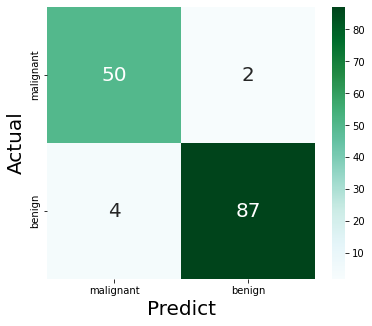

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot = True, annot_kws={'size': 20}, cmap = 'BuGn')
plt.xlabel('Predict', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)

'''

위의 것을 보면 4가 의미하는 것은 정상인데 암으로 예측한 것이고,
2가 의미하는 것은 암인데 정상으로 예측한 것이다.

저러한 2와 같은 경우가 나오지 않도록 해야한다.

즉, 성능이 높은 것이 전부가 아니다.

그래서 정밀도와 재현율이 중요한데, 세로방향은 정밀도, 가로방향은 재현율이다.


'''

## 정밀도 (Precision)

positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율
   - 중요 사례 : 스펨분류 / 스팸으로 분류한 메일 중에서 중요 메일이 있는 경우
   - precision = TP / (FP + TP)

In [33]:
from sklearn.metrics import precision_score

In [35]:
precision = precision_score(y_test, pred)
precision

0.9775280898876404

## 재현율 (Recall), 민감도
실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)
- TPR (True Positive Rate)

In [36]:
from sklearn.metrics import recall_score

In [39]:
recall = recall_score(y_test, pred)
recall

0.9560439560439561

## F1 Score
재현율과 정밀도의 균형을 나타내는 수지

recall, precision 어느 한쪽이 안좋으면 점수가 낮게 나온다
둘다 발란스가 좋아야 한다.
결국에 우리가 할려는 일은 정밀도도 재현율도 끌어올려서 F1 Score를 좋게 만드는 일

${F1 Score}=2*\: \frac{precision\:*\: recall}{precision+recall}$


In [40]:
2 * (precision * recall) / (precision + recall)

0.9666666666666667

In [41]:
from sklearn.metrics import f1_score

In [43]:
f1 = f1_score(y_test, pred)
f1

0.9666666666666667